# Assignment for Advance Regreassion using Lasso and Ridge

In [251]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import statsmodels Linear Regression library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import sklearn Linear Regression library
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler,MinMaxScaler


#Install sweetviz library to get the auto EDA report by uncommenting the below line
# !pip install sweetviz 
import sweetviz as sv

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Step 1: Exploratory Data Analysis
- Reading with Pandas
- Performing the EDA on the data

In [252]:
# Read data from csv
house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [253]:
# Using the https://pypi.org/project/sweetviz/ library to perfom the auto EDA TO get More Ideas to perform EDA manually as well
#sweet_report = sv.analyze(house_df)
#sweet_report.show_html('sweet_report.html')



### Analysis for from the auto ML 

#### Data Frame

| Description | Count       |
| ----------- | ----------- |
| ROWS        | 1460        |
| DUPLICATES  | 0           |
| FEATURES    | 81          |
| CATEGORICAL | 54          |
| NUMERICAL   | 26          |
| TEXT        | 1           |

#### Observed the below missing values 

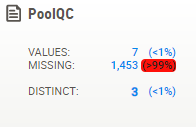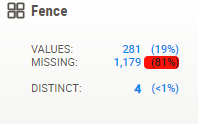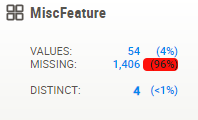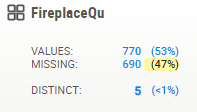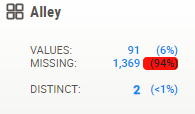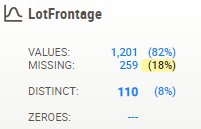

In [254]:
#Check shape of the df
print (house_df.shape )

(1460, 81)


In [255]:
#Describe DF
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [256]:
#Information of the data frame
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking the dataset for the amount of nulls present

In [257]:
# Checking for nul values 
round(house_df.isnull().sum()/len(house_df.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
dtype: float64

#### Considering 10% as my threshold and dropping the column having more then the threshold also As observed in the Auto ML

In [258]:
round(house_df.isnull().sum()/len(house_df.index),2)[round(house_df.isnull().sum()/
                                                                 len(house_df.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [259]:
try:
    house_df = house_df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')
except:
    print("Already colunms are dropped")

#### Before going further we will try to convert the Year columns with the age where we are going to fill these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [260]:
house_df['YearBuilt_Old'] = house_df.YearBuilt.max()-house_df.YearBuilt
house_df['YearRemodAdd_Old'] = house_df.YearRemodAdd.max()-house_df.YearRemodAdd
house_df['GarageYrBlt_Old'] = house_df.GarageYrBlt.max()-house_df.GarageYrBlt
house_df['YrSold_Old'] = house_df.YrSold.max()-house_df.YrSold
house_df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
301,1998,1999,1998.0,2007,12,11,12.0,3
198,1912,1950,NaN,2009,98,60,NaN,1
343,2005,2005,2005.0,2008,5,5,5.0,2
277,1951,1951,1951.0,2010,59,59,59.0,0
15,1929,2001,1991.0,2007,81,9,19.0,3
791,1976,1976,1976.0,2007,34,34,34.0,3
1406,1972,2007,1988.0,2009,38,3,22.0,1
378,2010,2010,2010.0,2010,0,0,0.0,0
1068,1973,1973,1973.0,2006,37,37,37.0,4
214,1977,1977,1977.0,2010,33,33,33.0,0


#### Lets drop the actual Year columns

In [261]:
house_df = house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

##### Imputing missing value

#### Notice imputing GarageYrBlt_Old with -1 as these house donot have garage

In [262]:
house_df.MasVnrType.fillna('None',inplace=True)
house_df.MasVnrArea.fillna(house_df.MasVnrArea.mean(),inplace=True)
house_df.BsmtQual.fillna('TA',inplace=True)
house_df.BsmtCond.fillna('TA',inplace=True)
house_df.BsmtExposure.fillna('No',inplace=True)
house_df.BsmtFinType1.fillna('Unf',inplace=True)
house_df.BsmtFinType2.fillna('Unf',inplace=True)
house_df.GarageType.fillna('Attchd',inplace=True)
house_df.GarageYrBlt_Old.fillna(-1,inplace=True)
house_df.GarageFinish.fillna('Unf',inplace=True)
house_df.GarageQual.fillna('TA',inplace=True)
house_df.GarageCond.fillna('TA',inplace=True)

#### As per the analysis 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns

In [263]:
house_df.Street.value_counts()
house_df.Utilities.value_counts()
house_df = house_df.drop(['Street','Utilities'],axis='columns')

#### 'Id' column is also of no use for our analysis hence dropping the column# 

In [264]:
house_df = house_df.drop('Id',axis='columns')

In [265]:
house_df[list(house_df.dtypes[house_df.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


# Step 2: Visualising the Data


#### Lets plot some graph for the EDA purpose

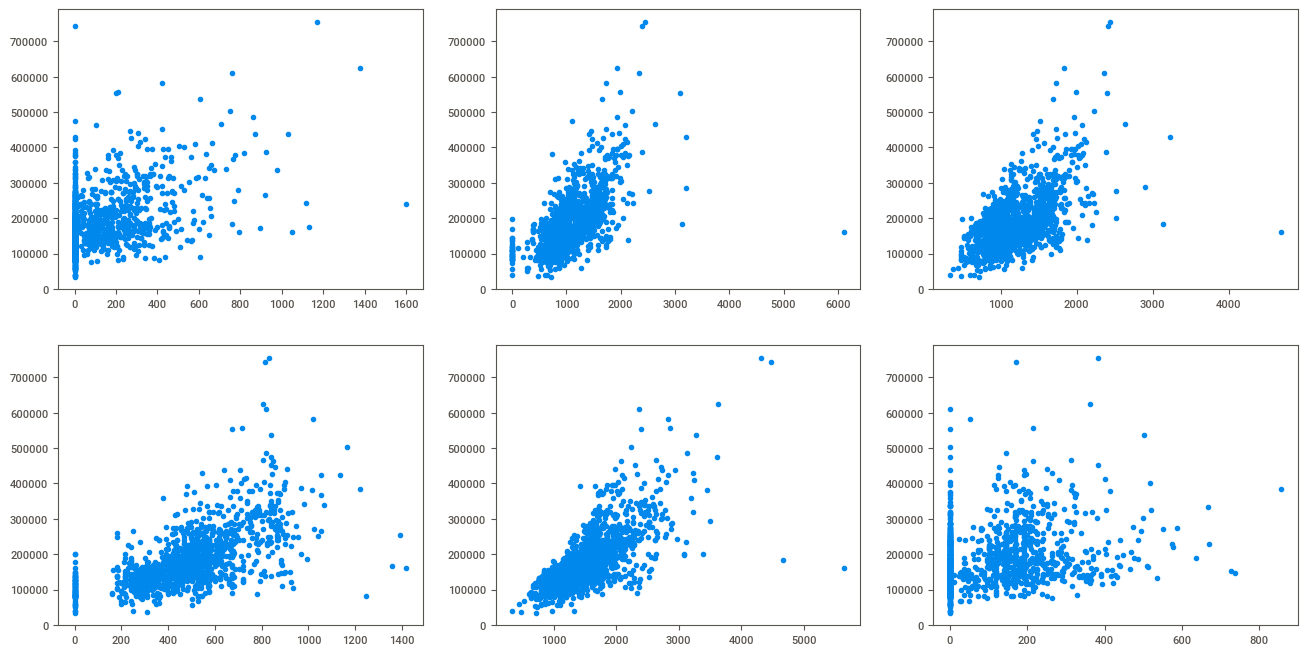

In [266]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_df.MasVnrArea,house_df.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_df.TotalBsmtSF,house_df.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_df['1stFlrSF'],house_df.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_df['GarageArea'],house_df.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_df['GrLivArea'],house_df.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_df['WoodDeckSF'],house_df.SalePrice)

#### Plotting heatmap to check the corellation between varables

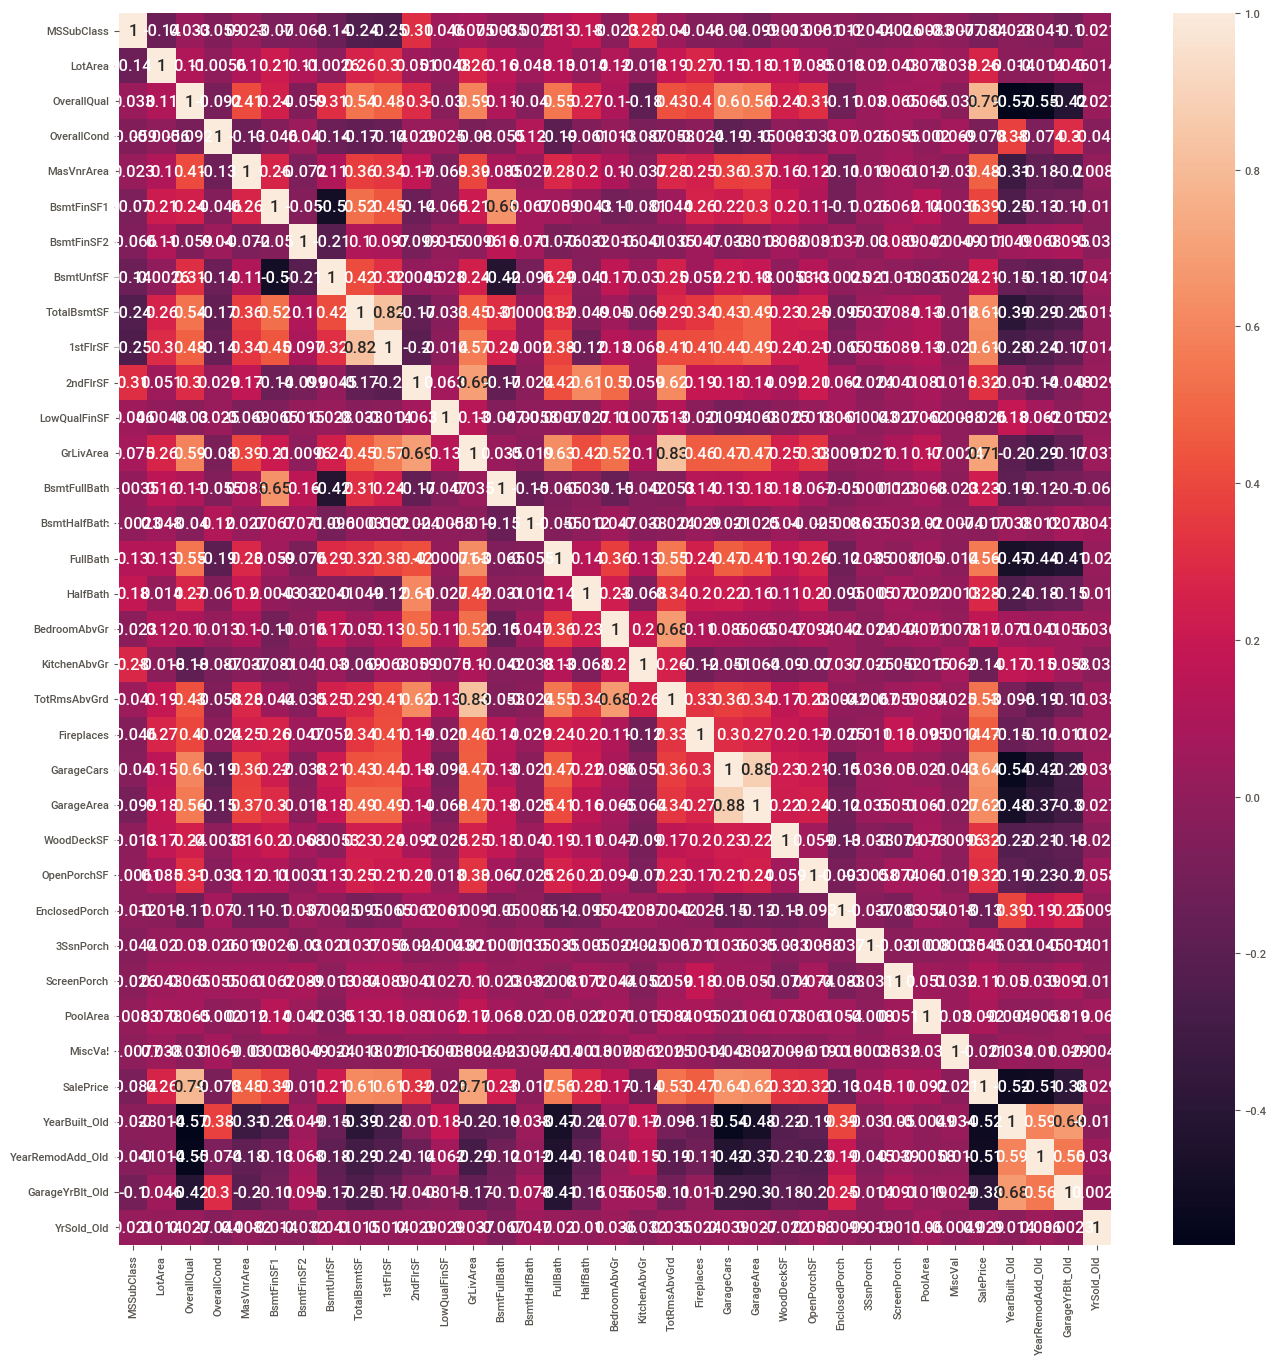

In [267]:
plt.figure(figsize=(16,16))
sns.heatmap(house_df[list(house_df.dtypes[house_df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### We can see from the above chart that the top 10 variables are similar to what we had initially deciphered

    - OverallQual - It is obvious that having a good quality house would fetch bigger price
    - Grlivarea - More the area of the floor above the ground floor, greater is the price
    - Garage cars, garage area, total basement SF, 1st floor SF -Seems to make sense 

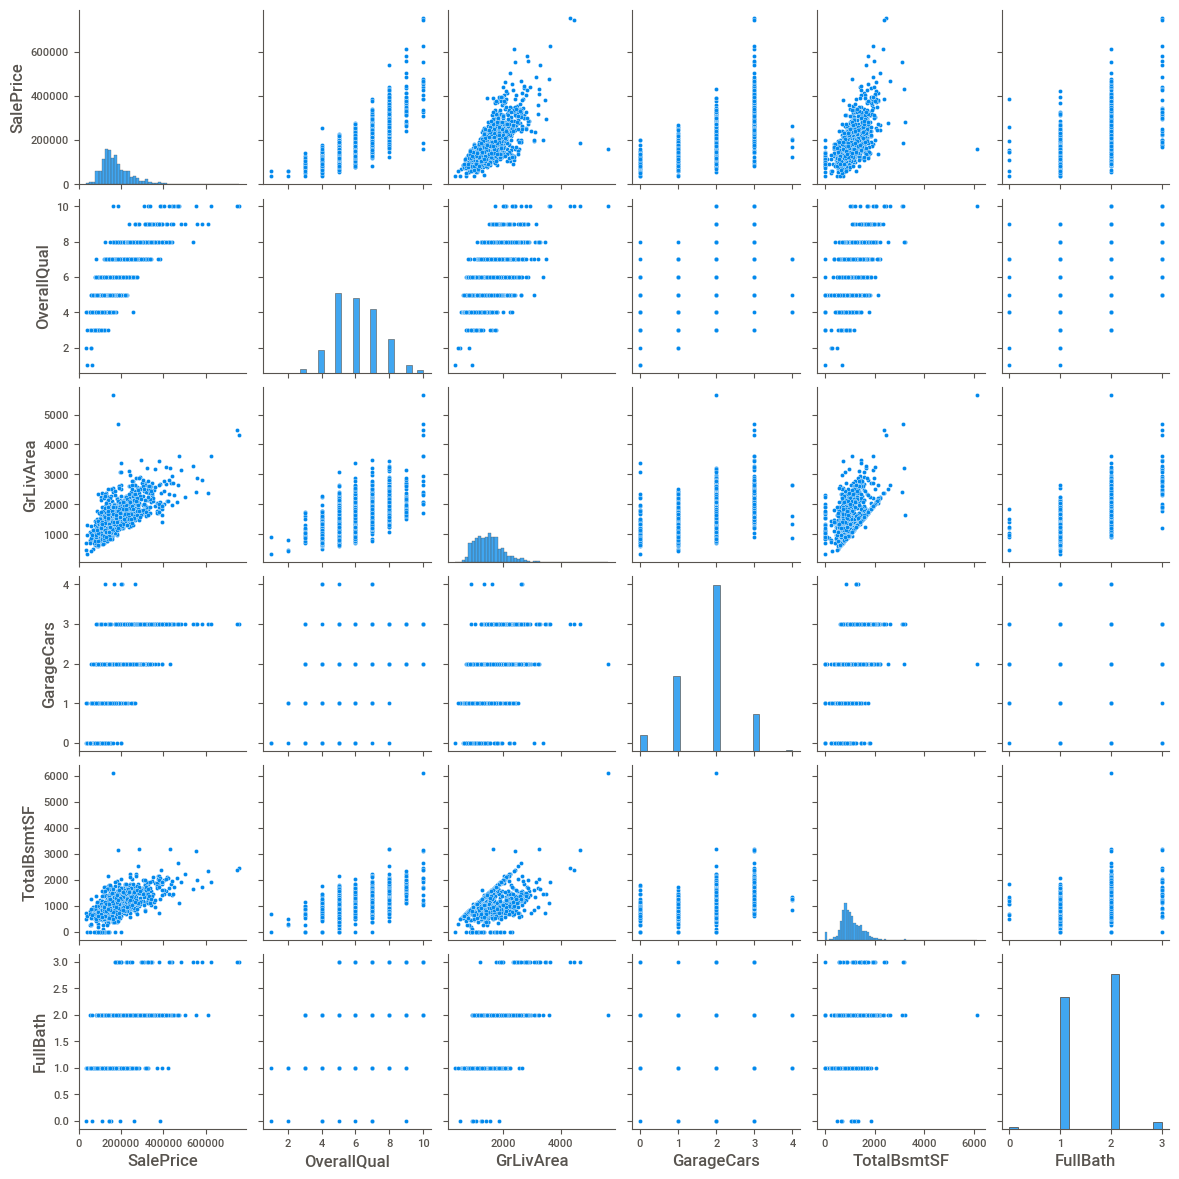

In [268]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(house_df[cols],height = 2)
plt.show()

#### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively

In [269]:
house_df.shape

(1460, 71)

In [270]:
num_col = list(house_df.dtypes[house_df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df = drop_outliers(house_df)

In [271]:
house_df.shape

(1441, 71)

In [272]:
house_df[list(house_df.dtypes[house_df.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Lets check for the below columns here we can clearly see that these are having some kind of order and hence we can say these are ordinal in nature

In [273]:
house_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


# Step 3: Data Preparation


#### Let convert the columns

In [274]:
house_df['LandSlope'] = house_df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_df['ExterQual'] = house_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['BsmtQual'] = house_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtCond'] = house_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtExposure'] = house_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df['BsmtFinType1'] = house_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['BsmtFinType2'] = house_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['HeatingQC'] = house_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['CentralAir'] = house_df.CentralAir.map({'N':0,'Y':1})
house_df['KitchenQual'] = house_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['GarageFinish'] = house_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_df['GarageQual'] = house_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['GarageCond'] = house_df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['ExterCond'] = house_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['LotShape'] = house_df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

#### Lets take a look into the converted columns

In [275]:
house_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()


,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


#### Creating and joining dummy column with the actual dataset

In [276]:
try:
    dummy_col = pd.get_dummies(house_df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)
except:
    print("Columns already dropped")

In [277]:
house_df = pd.concat([house_df,dummy_col],axis='columns')

In [278]:
try:
    house_df = house_df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')
except:
     print("Columns already dropped")

#### Let us check the distribution of our target variable before scaling and Splitting

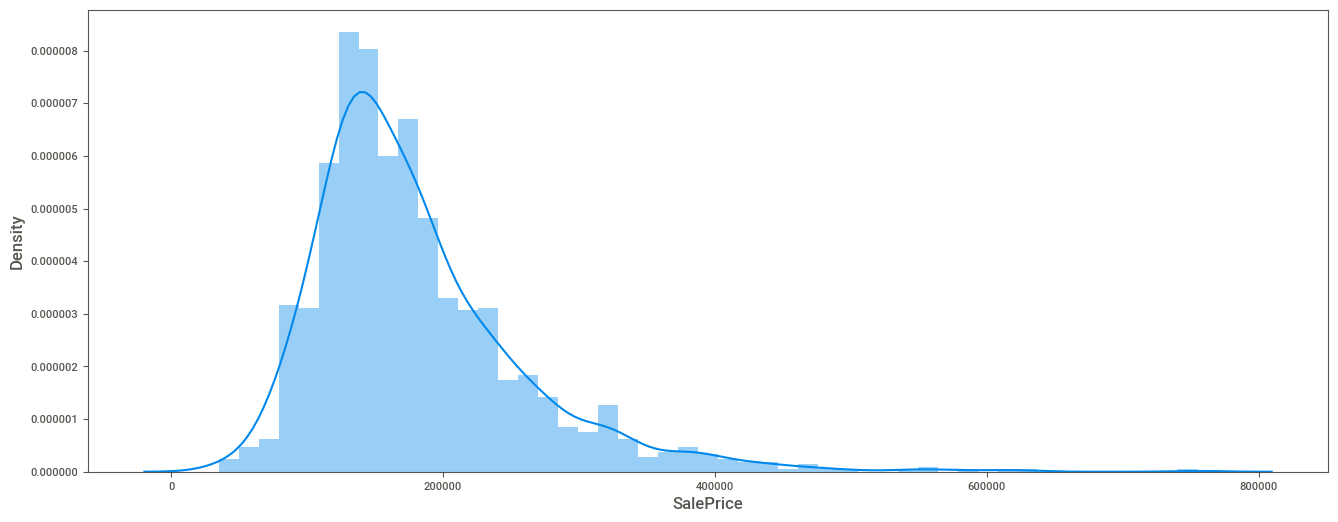

In [279]:
plt.figure(figsize=(16,6))
sns.distplot(house_df.SalePrice)
plt.show()

# Step 4: Splitting the Data into Training and Test Set


#### Creating train and test dataset for validation purpose

In [280]:
df_train,df_test = train_test_split(house_df,train_size=0.7,test_size=0.3,random_state=42)

In [281]:
house_df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [282]:
print ( df_train.shape ) 
print ( df_test.shape )

(1008, 193)
(433, 193)


In [283]:
df_train.describe()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,...,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,56.741071,10128.112103,1.944444,0.062500,6.124008,5.580357,107.161505,2.398810,2.090278,3.572421,...,0.002976,0.001984,0.083333,0.000992,0.871032,0.002976,0.006944,0.012897,0.829365,0.085317
std,41.572485,5794.708464,1.408898,0.273021,1.369079,1.118363,183.455139,0.570439,0.357616,0.671977,...,0.054500,0.044521,0.276523,0.031497,0.335331,0.054500,0.083085,0.112886,0.376376,0.279492
min,20.000000,1300.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7500.000000,0.000000,0.000000,5.000000,5.000000,0.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,9445.500000,3.000000,0.000000,6.000000,5.000000,0.000000,2.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,11500.000000,3.000000,0.000000,7.000000,6.000000,168.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,70761.000000,3.000000,2.000000,10.000000,9.000000,1600.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Scaling the train dataset

#### Note as scale of our dependent valriable SalePrice is very different with the independent variable i am scaling the dependent variable 

In [284]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

#### Lets check the distribution again after scaling

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

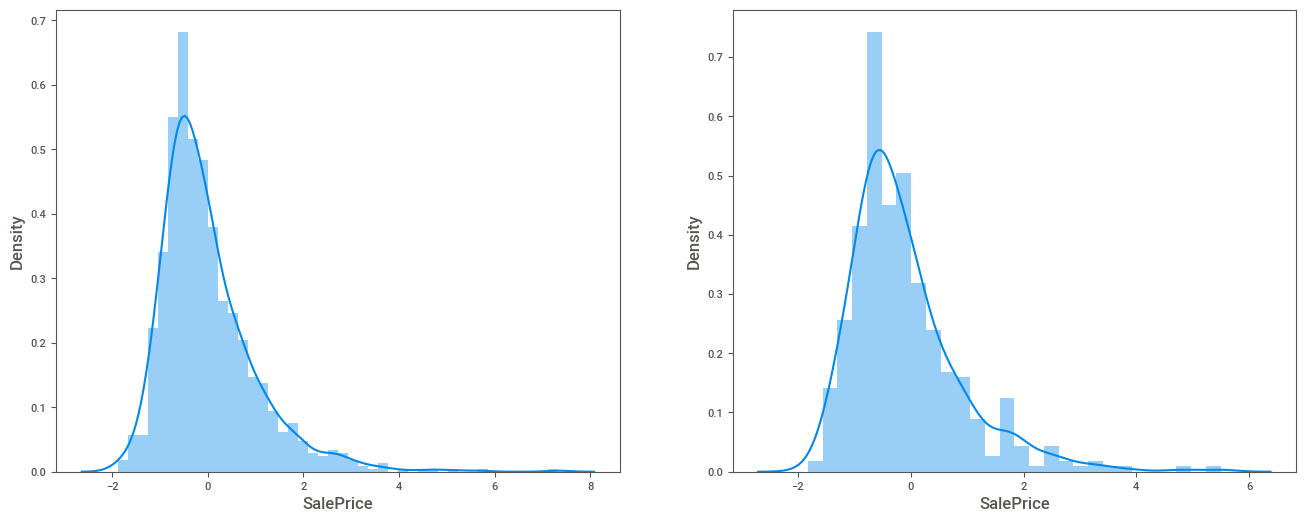

In [285]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Spliting the dependent and independent variable


In [286]:
#SalePrice is our Target Variable
try:
    y_train = df_train.pop('SalePrice')
except: 
    print("SalesPrice already poped")
    X_train = df_train

In [287]:
#SalePrice is our Target Variable
try:
    y_test = df_test.pop('SalePrice')
except: 
    print("SalesPrice already poped")
X_test = df_test

# Step 5: Building a linear model


#### Now using  RFE  lets try to to find the optimal number of feature

In [301]:
#Applying RFE with the 35 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=70)
rfe = rfe.fit(X_train,y_train)

In [302]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [303]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [304]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lets try first with the Lasso regression model

In [305]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8997818054552352
0.8508353005565308


In [306]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.145),
 ('LotArea', 0.202),
 ('LotShape', 0.105),
 ('LandSlope', 0.141),
 ('OverallQual', 0.145),
 ('OverallCond', 0.04),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.073),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.003),
 ('BsmtCond', -0.021),
 ('BsmtExposure', 0.304),
 ('BsmtFinType1', 0.138),
 ('BsmtFinSF1', 0.105),
 ('BsmtFinType2', 0.053),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.09),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', -0.022),
 ('CentralAir', 0.191),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.258),
 ('LowQualFinSF', -0.11),
 ('GrLivArea', -0.123),
 ('BsmtFullBath', -0.143),
 ('BsmtHalfBath', -0.105),
 ('FullBath', 0.254),
 ('HalfBath', 0.416),
 ('BedroomAbvGr', -0.109),
 ('KitchenAbvGr', -0.044),
 ('KitchenQual', 0.232),
 ('TotRmsAbvGrd', 0.096),
 ('Fireplaces', -0.052),
 ('GarageFinish', 0.079),
 ('GarageCars', -2.11),
 ('GarageArea', -0.238),
 ('GarageQual', -0.204),
 ('GarageCond', -0.0),
 ('WoodDeckSF', -0.152),
 ('OpenPorchSF', -0.069),
 ('EnclosedPorch', 0.0),
 ('3SsnPorc

In [307]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [308]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.021095,0.002275,0.001501,0.000499,0.001,{'alpha': 0.001},0.850414,0.907151,0.834646,0.879571,...,0.905431,0.901148,0.898657,0.900259,0.898130,0.911194,0.900594,0.897015,0.901277,0.004050
1,0.003767,0.000548,0.001300,0.000458,0.010,{'alpha': 0.01},0.812885,0.863299,0.834814,0.832954,...,0.847372,0.844847,0.843457,0.842931,0.842376,0.875629,0.845576,0.840460,0.847551,0.009627
2,0.002747,0.000432,0.001201,0.000399,0.100,{'alpha': 0.1},0.737558,0.818260,0.772405,0.755166,...,0.789925,0.797497,0.792001,0.793017,0.787020,0.823363,0.792932,0.787837,0.795240,0.009959
3,0.002252,0.000405,0.001300,0.000458,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002201,0.000400,0.001300,0.000458,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


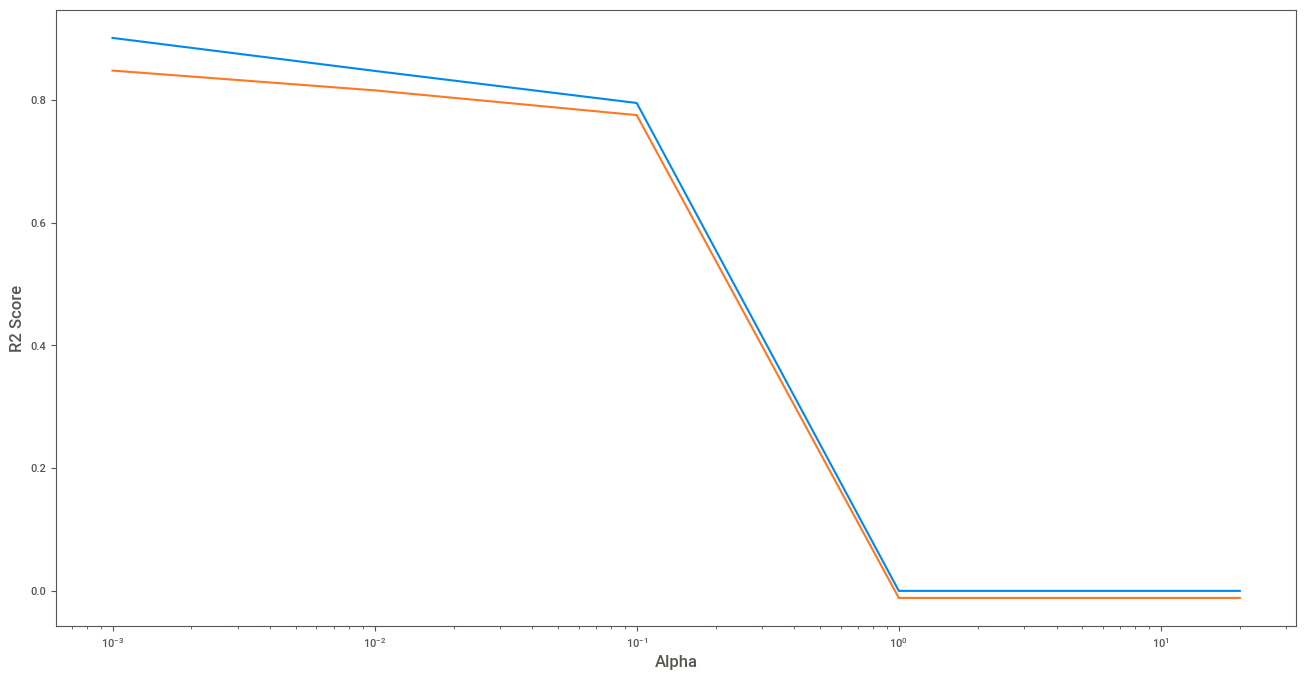

In [309]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [310]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [311]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8997818054552352
0.8508353005565308


In [312]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [313]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
45,YearBuilt_Old,1.563695
27,HalfBath,0.416318
67,Neighborhood_Gilbert,0.354521
11,BsmtExposure,0.303767
21,2ndFlrSF,0.258276
26,FullBath,0.254263
30,KitchenQual,0.232498
1,LotArea,0.202148
19,CentralAir,0.190622
46,YearRemodAdd_Old,0.168841


## Now lets use the ridge regression

In [314]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9058385649785594
0.8396253995361806


#### As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [315]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [316]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002818,0.000519,0.001605,0.000524,0.001,{'alpha': 0.001},0.854970,0.909810,0.794729,0.884073,...,0.912616,0.907589,0.905165,0.906272,0.904352,0.917270,0.906407,0.902962,0.907514,0.004133
1,0.002900,0.000479,0.001333,0.000398,0.010,{'alpha': 0.01},0.855623,0.909770,0.797483,0.884027,...,0.912612,0.907587,0.905164,0.906271,0.904351,0.917270,0.906406,0.902960,0.907512,0.004133
2,0.002579,0.000563,0.001401,0.000490,0.100,{'alpha': 0.1},0.859886,0.909312,0.820321,0.883584,...,0.912290,0.907496,0.905070,0.906173,0.904247,0.917215,0.906304,0.902867,0.907394,0.004116
3,0.002654,0.000634,0.001605,0.000436,0.200,{'alpha': 0.2},0.862065,0.908725,0.838241,0.883124,...,0.911555,0.907274,0.904840,0.905940,0.904006,0.917090,0.906059,0.902640,0.907119,0.004084
4,0.002400,0.000490,0.001600,0.000490,0.500,{'alpha': 0.5},0.863747,0.906745,0.867002,0.881918,...,0.908620,0.906241,0.903772,0.904882,0.902925,0.916550,0.904930,0.901581,0.905909,0.004056


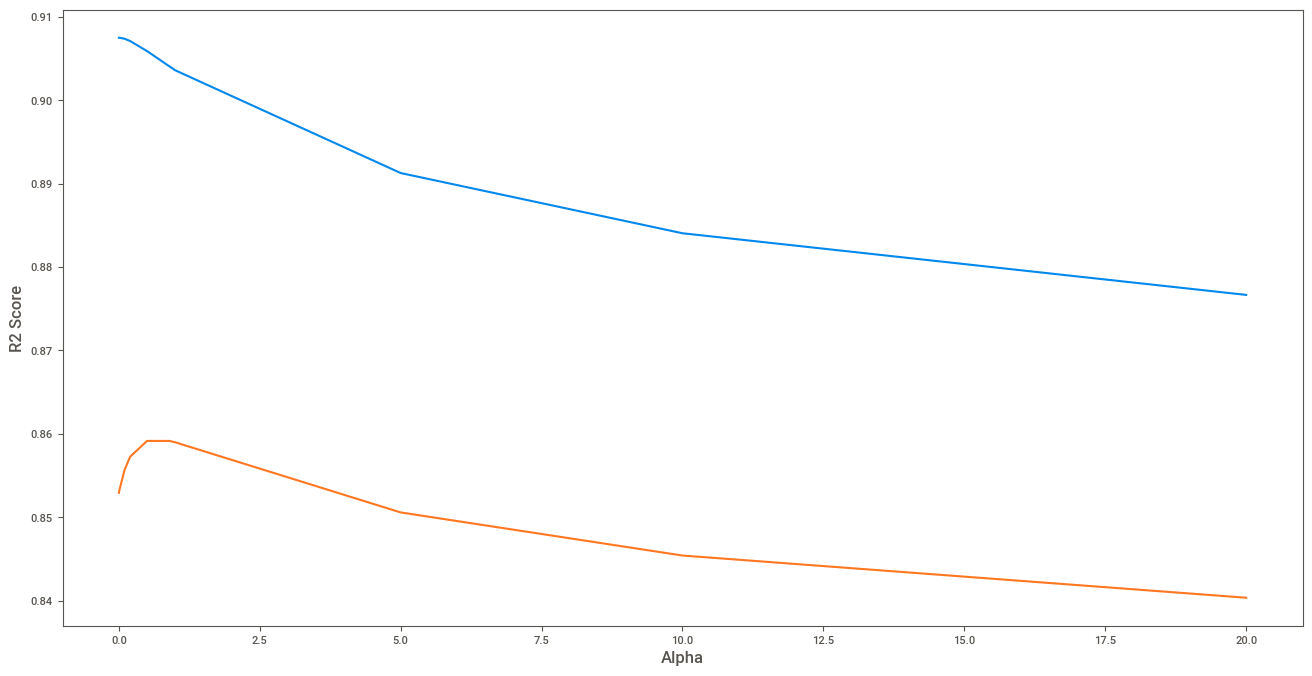

In [317]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model

In [318]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.9}

In [319]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9030452762053587
0.8482916026769391


In [324]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [325]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
45,YearBuilt_Old,1.541575
27,HalfBath,0.447825
67,Neighborhood_Gilbert,0.409108
30,KitchenQual,0.324721
14,BsmtFinType2,0.296814
41,3SsnPorch,0.295713
16,BsmtUnfSF,0.290768
68,Neighborhood_IDOTRR,0.289643
26,FullBath,0.282436
21,2ndFlrSF,0.273452


### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

# Final Model

In [327]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8997818054552352
0.8508353005565308


#### After compairing both the model we can see that the below Features are best explaining the DataSet

In [328]:
#MiscVal      : $Value of miscellaneous feature 
#BsmtHalfBath : Basement half bathrooms
#LowQualFinSF : Low quality finished square feet (all floors)
#BsmtFullBath : Basement full bathrooms
#HalfBath     : Half baths above grade

# Best alpha value for Lasso : {'alpha': 0.001}

# Best alpha value for Ridge : {'alpha': 0.9}